# Colab Setup

In [1]:
!nvidia-smi

Wed Dec 18 13:37:16 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!pip install git+https://github.com/yoke2/ytb.git

  Cloning https://github.com/yoke2/ytb.git to /tmp/pip-req-build-vyd3xgdw
  Running command git clone -q https://github.com/yoke2/ytb.git /tmp/pip-req-build-vyd3xgdw
  Created wheel for ytb: filename=ytb-0.0.1-cp36-none-any.whl size=10877 sha256=cc2255774e10fd8e44df0f0916dad4a35f88c2e9397df8d78166ba9a11fdad84
  Stored in directory: /tmp/pip-ephem-wheel-cache-bv5wuyyq/wheels/a3/12/42/d6862238e1a2116bf1b1ebc7bbe07aae8c8bb8b92bf51c6737
Successfully built ytb


In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [4]:
import gdown
import zipfile
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
print(tf.__version__)

2.1.0-rc1


In [0]:
from ytb.imgtools import *
from ytb.tftools import *

# Data Setup

## Download Data - From List

In [6]:
gdown.download('https://drive.google.com/uc?export=download&id=18QDpvCyO2BsX2ILMDWyFubvFzPBLkoAi', output='food_urls_3class.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=18QDpvCyO2BsX2ILMDWyFubvFzPBLkoAi
To: /content/food_urls_3class.zip
100%|██████████| 36.9k/36.9k [00:00<00:00, 29.3MB/s]


'food_urls_3class.zip'

In [0]:
with zipfile.ZipFile('food_urls_3class.zip', 'r') as zipObj:
    zipObj.extractall()

In [8]:
results_cr = download_images('chicken_rice.txt', 'data/chicken_rice')
list(filter(lambda x:'Failed' in x, results_cr))

[]

In [9]:
results_mg = download_images('mee_goreng.txt', './data/mee_goreng')
list(filter(lambda x:'Failed' in x, results_mg))

["Failed: Couldn't download x-raw-image:///b2f64b6cb4c7a85cbc3dfd0e93977710cacdb40273a1f1276ac88b5536e732ae.",
 "Failed: Couldn't download x-raw-image:///ad8756217c1af3ab15560e9f16ed250213589022eae2dec97b2f875f6ce1a8ef.",
 "Failed: Couldn't download https://www.planetsushi.hu/wp-content/uploads/Mee-Goreng.jpg."]

In [10]:
results_rp = download_images('roti_prata.txt', './data/roti_prata')
list(filter(lambda x:'Failed' in x, results_rp))

["Failed: Couldn't download http://www.makansutra.com/images/story/detail/03c84a_sdefregtrhy5.jpg.",
 "Failed: Couldn't download https://admin.havehalalwilltravel.com/wp-content/uploads/2017/06/14-julaiha_900.jpg."]

In [0]:
!zip -r food_data.zip ./data

In [0]:
!curl https://getcroc.schollz.com | bash

In [0]:
!croc send food_data.zip

## Download Data - prepared zip

In [0]:
# Delete any previous data
!rm -rf ./data

In [15]:
gdown.download('https://drive.google.com/uc?export=download&id=1eCb_vLX03aTVUliWFVlKxDDcMLPjDDny', output='food_data.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1eCb_vLX03aTVUliWFVlKxDDcMLPjDDny
To: /content/food_data.zip
263MB [00:01, 156MB/s]


'food_data.zip'

In [0]:
with zipfile.ZipFile('food_data.zip', 'r') as zipObj:
    zipObj.extractall()

## Verify Images

In [12]:
verify_images(Path('./data'), delete=True, recurse=True, tf_image=True)

Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'Unable to decode bytes as JPEG, PNG, GIF, or BMP'
Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'Unable to decode bytes as JPEG, PNG, GIF, or BMP'
Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'Unable to decode bytes as JPEG, PNG, GIF, or BMP'
Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'Unable to decode bytes as JPEG, PNG, GIF, or BMP'
Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'Unable to decode bytes as JPEG, PNG, GIF, or BMP'
Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'Unable to decode bytes as JPEG, PNG, GIF, or BMP'
Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'Unable to decode bytes as JPEG, PNG, GIF, or BMP'
Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'Un

# Load dataset using tf.data

In [0]:
datapath=Path('./data')

In [14]:
CLASS_NAMES = np.array([x.name for x in datapath.glob('*')])
CLASS_NAMES

array(['mee_goreng', 'chicken_rice', 'roti_prata'], dtype='<U12')

In [0]:
BATCH_SIZE = 32
IMG_SIZE = 224

In [0]:
train_aug = [rcrop, rflip]
valid_aug = [crop]
aug = (train_aug, valid_aug)

In [0]:
all_files = get_image_files(datapath, recurse=True)

In [0]:
train_filepaths, tmp_filepaths = split_by_rand_pct(all_files, valid_pct=0.3, seed=42)
valid_filepaths, test_filepaths = split_by_rand_pct(tmp_filepaths, valid_pct=0.5, seed=42)

In [19]:
len(train_filepaths),len(valid_filepaths),len(test_filepaths)

(665, 142, 143)

In [0]:
train_ds = read_img_dataset([str(x) for x in train_filepaths], CLASS_NAMES=CLASS_NAMES, shuffle_size=1024, img_size=IMG_SIZE, batch_size=BATCH_SIZE, n_workers=4, augments=aug, mode='train')
valid_ds = read_img_dataset([str(x) for x in valid_filepaths], CLASS_NAMES=CLASS_NAMES, img_size=IMG_SIZE, batch_size=BATCH_SIZE, n_workers=4, augments=aug, mode='valid')
test_ds = read_img_dataset([str(x) for x in test_filepaths], CLASS_NAMES=CLASS_NAMES, img_size=IMG_SIZE, batch_size=BATCH_SIZE, n_workers=4, augments=aug, mode='test')

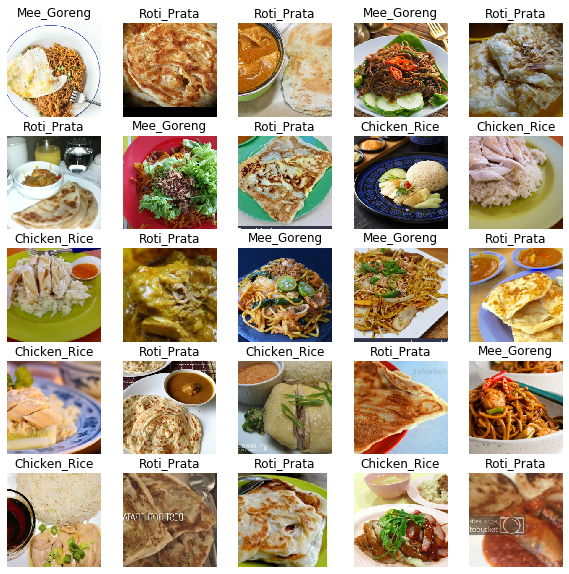

In [21]:
show_batch(train_ds,CLASS_NAMES)

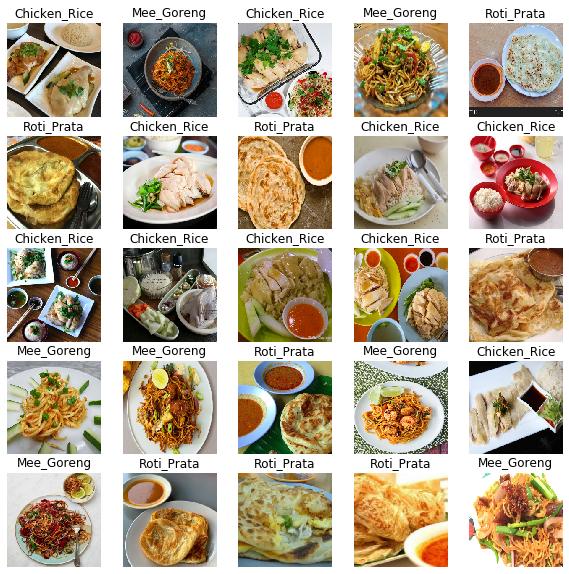

In [22]:
show_batch(valid_ds,CLASS_NAMES)

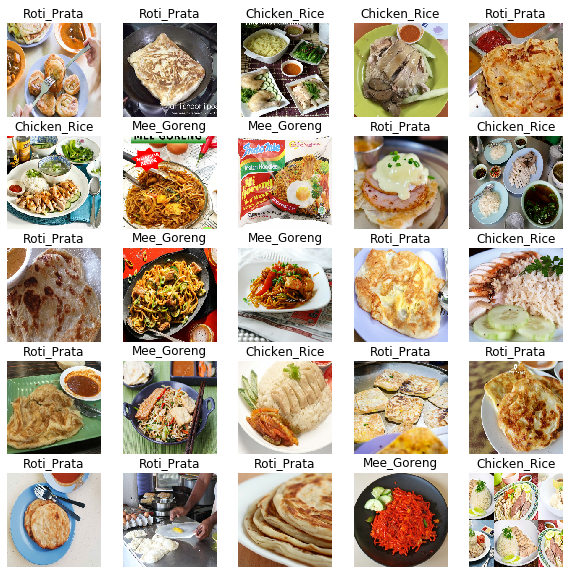

In [23]:
show_batch(test_ds,CLASS_NAMES)

# Model Training

## Initial Model

In [0]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [26]:
base_model = MobileNetV2(input_shape=(IMG_SIZE,IMG_SIZE,3),
                      include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

9412608/9406464 [==============================] - 1s 0us/step


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
modelname       = 'model'
filepath        = modelname + ".h5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_accuracy', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')
callbacks_list  = [checkpoint]

In [29]:
history = model.fit(train_ds,
                    epochs=10,
                    steps_per_epoch=len(train_filepaths)//BATCH_SIZE,
                    validation_data=valid_ds,
                    validation_steps=len(valid_filepaths)//BATCH_SIZE,
                    callbacks = callbacks_list)

Train for 20 steps, validate for 4 steps
Epoch 1/10
20/20 [==============================] - 9s 466ms/step - loss: 1.1769 - accuracy: 0.4969 - val_loss: 0.5111 - val_accuracy: 0.8125
Epoch 2/10
20/20 [==============================] - 1s 72ms/step - loss: 0.5736 - accuracy: 0.7688 - val_loss: 0.4264 - val_accuracy: 0.8203
Epoch 3/10
20/20 [==============================] - 1s 72ms/step - loss: 0.4481 - accuracy: 0.8313 - val_loss: 0.2943 - val_accuracy: 0.8672
Epoch 4/10
20/20 [==============================] - 1s 71ms/step - loss: 0.3644 - accuracy: 0.8609 - val_loss: 0.2450 - val_accuracy: 0.8984
Epoch 5/10
20/20 [==============================] - 1s 49ms/step - loss: 0.3534 - accuracy: 0.8656 - val_loss: 0.2651 - val_accuracy: 0.8984
Epoch 6/10
20/20 [==============================] - 2s 76ms/step - loss: 0.2921 - accuracy: 0.8938 - val_loss: 0.1652 - val_accuracy: 0.9609
Epoch 7/10
20/20 [==============================] - 1s 48ms/step - loss: 0.2962 - accuracy: 0.8859 - val_loss: 0

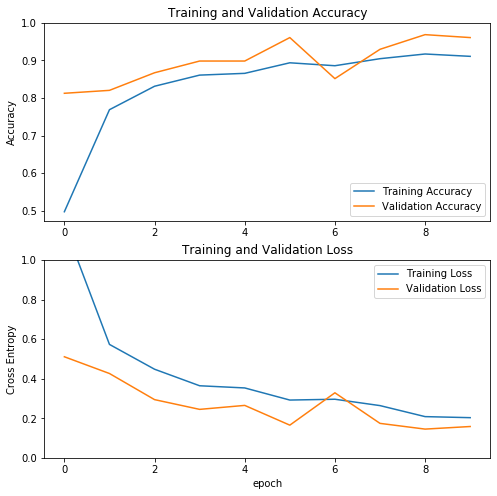

In [30]:
plot_history(history)

In [0]:
evalmod = load_model('model.h5')

In [32]:
evalmod.evaluate(valid_ds, steps=len(valid_filepaths)//BATCH_SIZE)

4/4 [==============================] - 1s 200ms/step - loss: 0.1452 - accuracy: 0.9688


[0.14517753943800926, 0.96875]

## Finetuning

In [0]:
base_model.trainable = True
# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
modelname       = 'model2'
filepath        = modelname + ".h5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_accuracy', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')
callbacks_list  = [checkpoint]

In [36]:
history = model.fit(train_ds,
                    epochs=10,
                    steps_per_epoch=len(train_filepaths)//BATCH_SIZE,
                    validation_data=valid_ds,
                    validation_steps=len(valid_filepaths)//BATCH_SIZE,
                    callbacks = callbacks_list)

Train for 20 steps, validate for 4 steps
Epoch 1/10
20/20 [==============================] - 5s 269ms/step - loss: 0.4723 - accuracy: 0.8719 - val_loss: 7.7631 - val_accuracy: 0.4922
Epoch 2/10
20/20 [==============================] - 2s 86ms/step - loss: 0.1366 - accuracy: 0.9578 - val_loss: 1.9637 - val_accuracy: 0.8516
Epoch 3/10
20/20 [==============================] - 2s 87ms/step - loss: 0.0440 - accuracy: 0.9891 - val_loss: 0.8924 - val_accuracy: 0.9141
Epoch 4/10
20/20 [==============================] - 2s 87ms/step - loss: 0.0415 - accuracy: 0.9828 - val_loss: 0.6381 - val_accuracy: 0.9453
Epoch 5/10
20/20 [==============================] - 2s 85ms/step - loss: 0.0687 - accuracy: 0.9781 - val_loss: 0.5064 - val_accuracy: 0.9688
Epoch 6/10
20/20 [==============================] - 1s 58ms/step - loss: 0.0575 - accuracy: 0.9859 - val_loss: 1.8668 - val_accuracy: 0.8594
Epoch 7/10
20/20 [==============================] - 1s 61ms/step - loss: 0.1677 - accuracy: 0.9609 - val_loss: 4

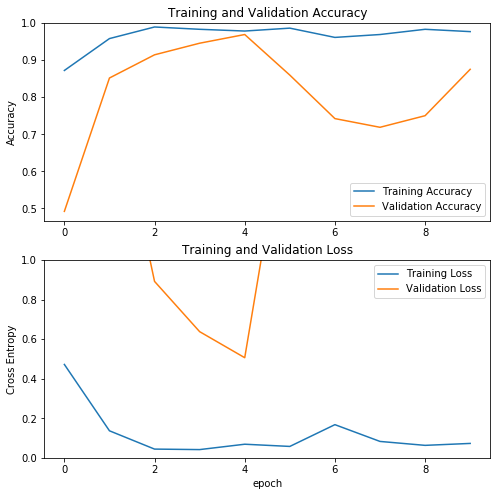

In [37]:
plot_history(history)

In [0]:
evalmod = load_model('model2.h5')

In [39]:
evalmod.evaluate(valid_ds, steps=len(valid_filepaths)//BATCH_SIZE)

4/4 [==============================] - 1s 185ms/step - loss: 0.5064 - accuracy: 0.9688


[0.5063888764990025, 0.96875]

# Model Evaluation and Prediction

## Evaluation on test set

In [40]:
evalmod.evaluate(test_ds, steps=len(test_filepaths)//BATCH_SIZE)

4/4 [==============================] - 2s 517ms/step - loss: 0.5442 - accuracy: 0.9453


[0.5442007091769483, 0.9453125]

## Predict Single Image

In [41]:
test_filepaths[-10:]

[PosixPath('data/mee_goreng/00000019.jpg'),
 PosixPath('data/roti_prata/00000114.jpg'),
 PosixPath('data/mee_goreng/00000150.jpg'),
 PosixPath('data/roti_prata/00000346.jpeg'),
 PosixPath('data/chicken_rice/00000103.jpg'),
 PosixPath('data/roti_prata/00000041.jpg'),
 PosixPath('data/chicken_rice/00000283.jpg'),
 PosixPath('data/mee_goreng/00000092.jpg'),
 PosixPath('data/roti_prata/00000290.jpg'),
 PosixPath('data/mee_goreng/00000085.jpg')]

In [42]:
CLASS_NAMES

array(['mee_goreng', 'chicken_rice', 'roti_prata'], dtype='<U12')

In [43]:
for x in test_filepaths[-10:]:
    img1 = read_img_dataset([str(x)], img_size=224, batch_size=1, n_workers=1, augments=aug, mode='predict')
    label_arg = evalmod.predict(img1, steps=1).argmax(axis=-1)[0]
    print(f'actual: {x.parts[-2]} predicted: {CLASS_NAMES[label_arg]} | {x.parts[-2] == CLASS_NAMES[label_arg]}')

actual: mee_goreng predicted: mee_goreng | True
actual: roti_prata predicted: roti_prata | True
actual: mee_goreng predicted: mee_goreng | True
actual: roti_prata predicted: roti_prata | True
actual: chicken_rice predicted: chicken_rice | True
actual: roti_prata predicted: roti_prata | True
actual: chicken_rice predicted: chicken_rice | True
actual: mee_goreng predicted: roti_prata | False
actual: roti_prata predicted: roti_prata | True
actual: mee_goreng predicted: mee_goreng | True
